In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [94]:
# 1 Import the data from medical_examination.csv and assign it to the df variable
df = pd.read_csv('medical_examination.csv')
#df.set_index('id', inplace=True)
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [95]:
# 2 Create the overweight column in the df variable
df['overweight'] = ((df['weight'] / ((df['height'] / 100) ** 2)) > 25) * 1
df.head(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0,1
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0,1
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0,1


In [96]:
# 3 Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = (df[['cholesterol']] != 1) * 1
df['gluc'] = (df[['gluc']] != 1) * 1
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [97]:
# 4 Draw the Categorical Plot in the draw_cat_plot function
def draw_cat_plot():
    # 5 Create a DataFrame for the cat plot using pd.melt with values from
    # cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
    df_cat = df.drop(columns=['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo']).melt(id_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    # 6 Group and reformat the data in df_cat to split it by cardio.
    # Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.drop(columns=['variable']).rename(columns={'value': 'cardio'}).melt(id_vars=['cardio'])
    # 7 Convert the data into long format and create a chart that shows
    # the value counts of the categorical features
    # using the following method provided by the seaborn library import : sns.catplot()
    chart = sns.catplot(data=df_cat, x='variable', col='cardio', hue='value', kind="count")
    chart.set_ylabels('total')
    # 8 Get the figure for the output and store it in the fig variable
    fig = chart.figure
    # 9 Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

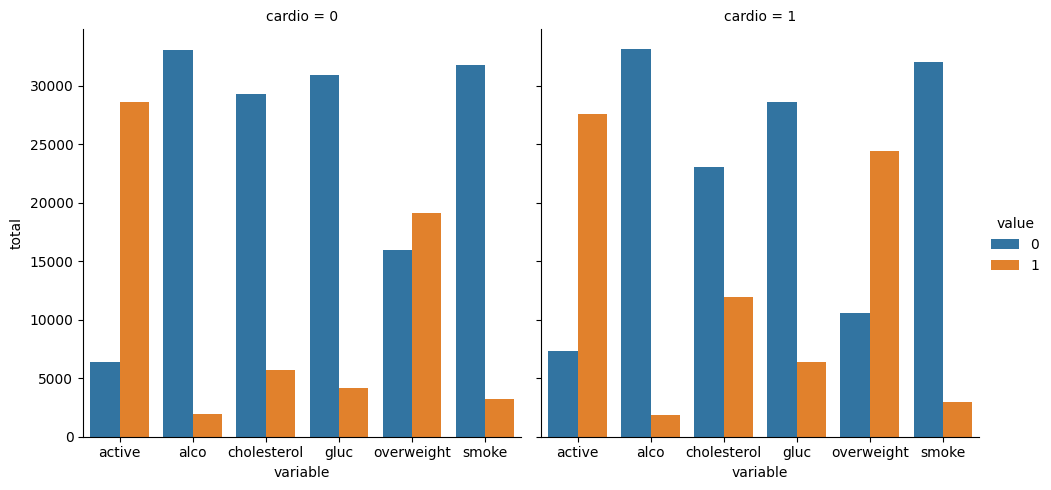

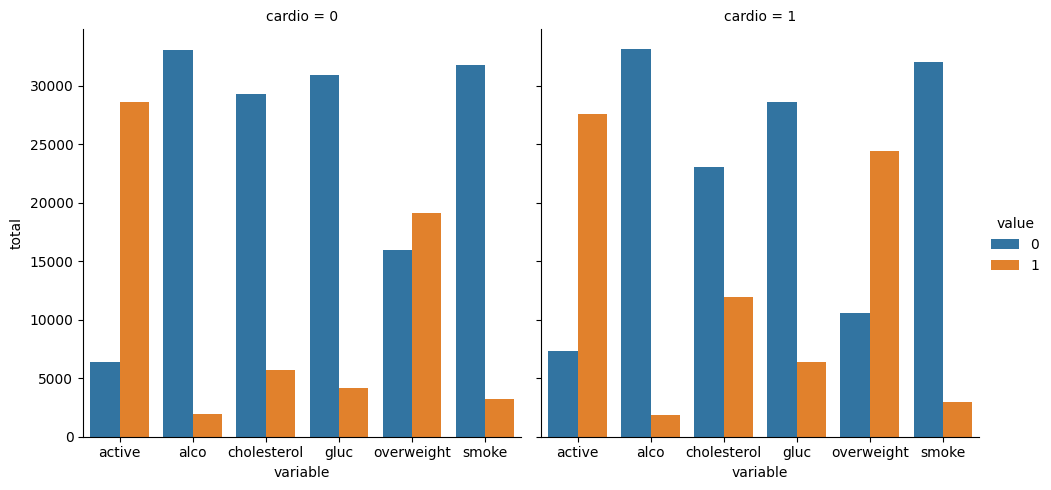

In [98]:
draw_cat_plot()

In [103]:
# 10 Draw the Heat Map in the draw_heat_map function
def draw_heat_map():
    # 11 Clean the data in the df_heat variable by filtering out the following patient segments
    # that represent incorrect data:
        # height is less than the 2.5th percentile
            # (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
        # height is more than the 97.5th percentile
        # weight is less than the 2.5th percentile
        # weight is more than the 97.5th percentile
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]
    
    # 12 Calculate the correlation matrix and store it in the corr variable
    corr = df_heat.corr()

    # 13 Generate a mask for the upper triangle and store it in the mask variable
    mask = np.triu(np.ones_like(corr))

    # 14 Set up the matplotlib figure
    fig, ax = plt.figure(), plt.axes()
    
    # 15 Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap()
    sns.heatmap(corr, annot=True, fmt=".1f", linewidths=.5, mask=mask, robust=True)
    
    # 16 Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

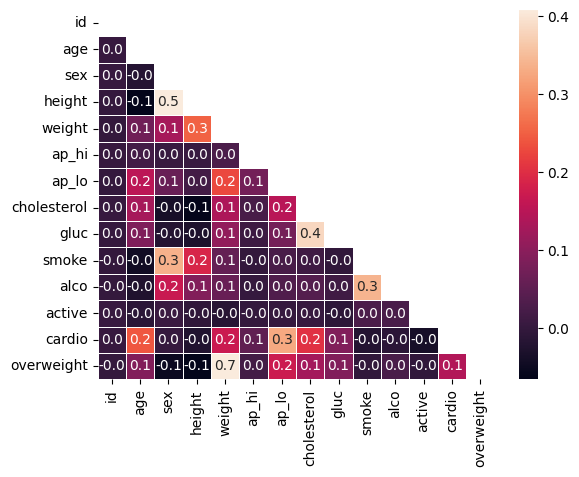

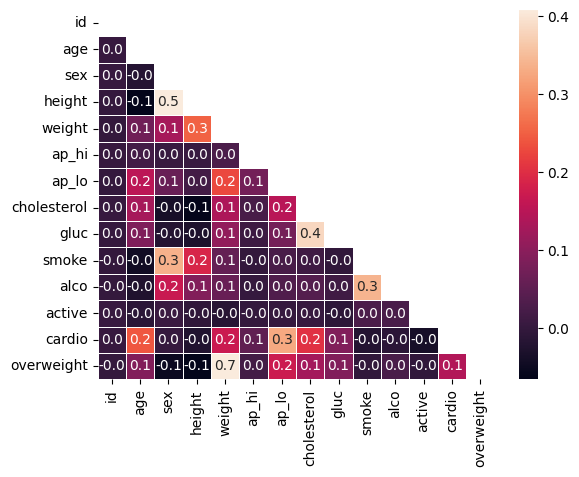

In [104]:
draw_heat_map()